In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic=pd.read_csv('Titanic-Dataset.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: title={'center': 'Missing values'}>

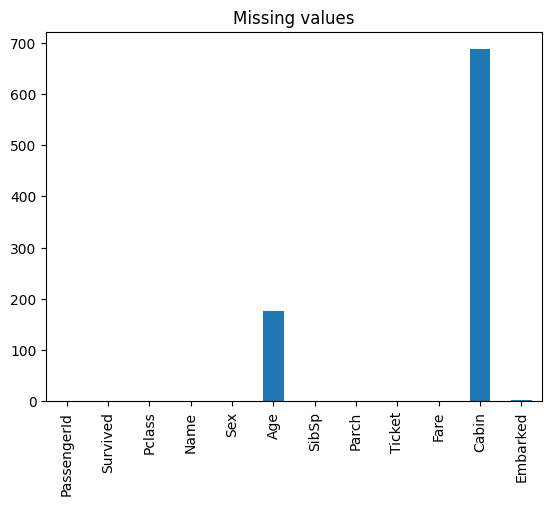

In [5]:
titanic.isnull().sum().plot(kind='bar', title='Missing values', legend=False)

In [6]:
titanic.drop(['Cabin', 'PassengerId', 'Name', 'Ticket', 'Fare'], axis=1, inplace=True)
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,S
887,1,1,female,19.0,0,0,S
888,0,3,female,NaN,1,2,S
889,1,1,male,26.0,0,0,C


In [7]:
from sklearn.impute import SimpleImputer
imputer1=SimpleImputer(strategy='mean')
titanic['Age']=imputer1.fit_transform(titanic[['Age']])

In [8]:
imputer2=SimpleImputer(strategy='most_frequent')
titanic[['Embarked']]=imputer2.fit_transform(titanic[['Embarked']])

In [9]:
titanic.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [10]:
titanic['Family']=titanic['SibSp']+titanic['Parch']
titanic.loc[titanic['Family']>0, 'Travelled_alone']=0
titanic.loc[titanic['Family']==0, 'Travelled_alone']=1
titanic.drop(['SibSp', 'Parch'], axis=1, inplace=True)
titanic

,Survived,Pclass,Sex,Age,Embarked,Family,Travelled_alone
0,0,3,male,22.000000,S,1,0.0
1,1,1,female,38.000000,C,1,0.0
2,1,3,female,26.000000,S,0,1.0
3,1,1,female,35.000000,S,1,0.0
4,0,3,male,35.000000,S,0,1.0
...,...,...,...,...,...,...,...
886,0,2,male,27.000000,S,0,1.0
887,1,1,female,19.000000,S,0,1.0
888,0,3,female,29.699118,S,3,0.0
889,1,1,male,26.000000,C,0,1.0


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
titanic['Sex']=encoder.fit_transform(titanic['Sex'])
titanic['Embarked']=encoder.fit_transform(titanic['Embarked'])

In [12]:
titanic

,Survived,Pclass,Sex,Age,Embarked,Family,Travelled_alone
0,0,3,1,22.000000,2,1,0.0
1,1,1,0,38.000000,0,1,0.0
2,1,3,0,26.000000,2,0,1.0
3,1,1,0,35.000000,2,1,0.0
4,0,3,1,35.000000,2,0,1.0
...,...,...,...,...,...,...,...
886,0,2,1,27.000000,2,0,1.0
887,1,1,0,19.000000,2,0,1.0
888,0,3,0,29.699118,2,3,0.0
889,1,1,1,26.000000,0,0,1.0


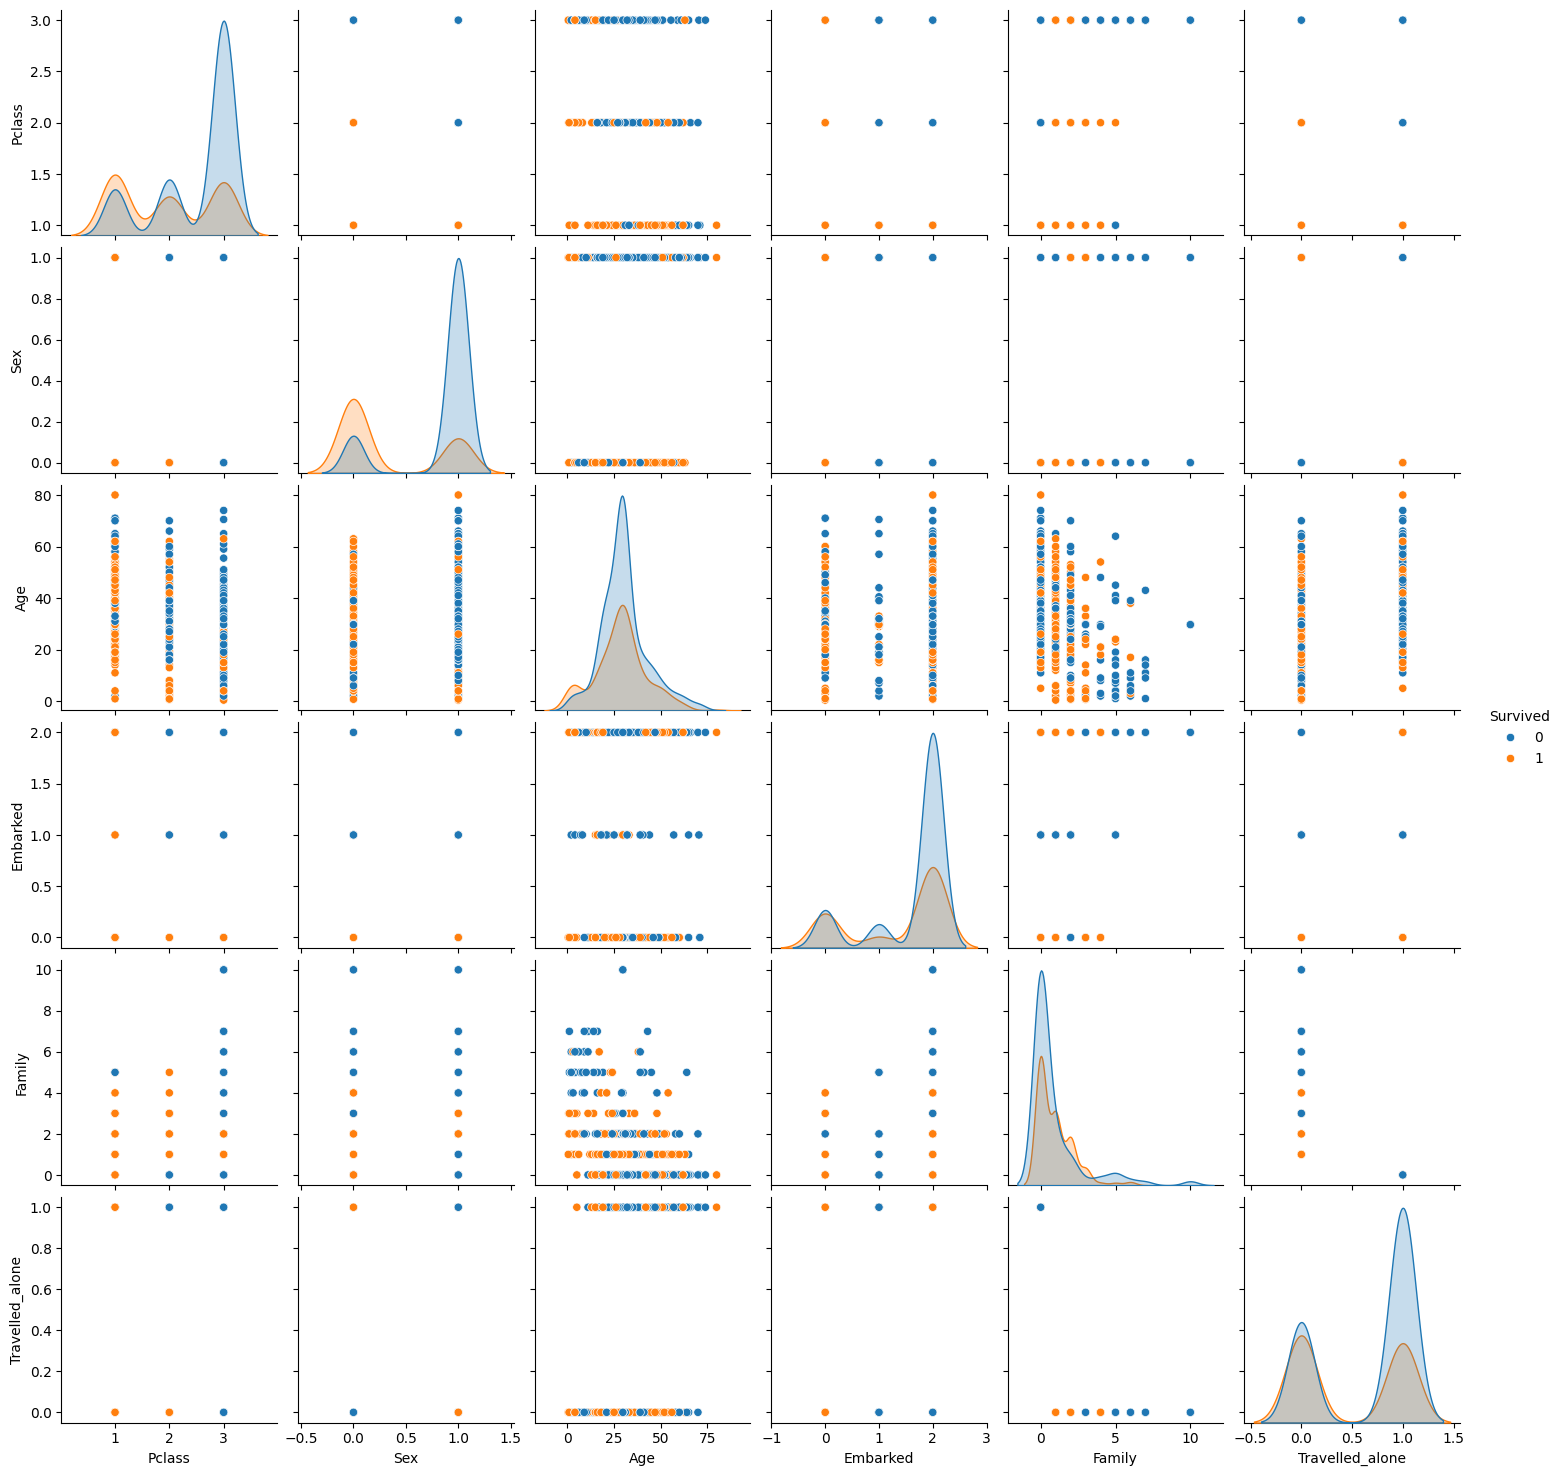

In [13]:
sns.pairplot(data=titanic, hue='Survived')
plt.show()

In [14]:
X=titanic.iloc[:, 1:]
X

,Pclass,Sex,Age,Embarked,Family,Travelled_alone
0,3,1,22.000000,2,1,0.0
1,1,0,38.000000,0,1,0.0
2,3,0,26.000000,2,0,1.0
3,1,0,35.000000,2,1,0.0
4,3,1,35.000000,2,0,1.0
...,...,...,...,...,...,...
886,2,1,27.000000,2,0,1.0
887,1,0,19.000000,2,0,1.0
888,3,0,29.699118,2,3,0.0
889,1,1,26.000000,0,0,1.0


In [15]:
y=titanic.iloc[:, 0]
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=0)

In [17]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [18]:
pred=model.predict(X_test)
pred

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1], dtype=int64)

In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(pred, y_test)

0.7985074626865671